In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = './handsign.csv'
model_save_path = './handsign_classifier.keras'
tflite_save_path = './handsign_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 26

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(0, (21 * 2))), skiprows=1)

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=((21 * 2)), skiprows=1)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout (Dropout)               │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 26)             │           286 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,356 (5.30 KB)

 Trainable params: 1,356 (5.30 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [11]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [12]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/36 ━━━━━━━━━━━━━━━━━━━━ 27s 799ms/step - accuracy: 0.0391 - loss: 3.3343
Epoch 1: saving model to ./handsign_classifier.keras
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0589 - loss: 3.2161 - val_accuracy: 0.0993 - val_loss: 2.9313
Epoch 2/1000
 1/36 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.0859 - loss: 2.9825
Epoch 2: saving model to ./handsign_classifier.keras
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0860 - loss: 2.9281 - val_accuracy: 0.0993 - val_loss: 2.6867
Epoch 3/1000
 1/36 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.1172 - loss: 2.7257
Epoch 3: saving model to ./handsign_classifier.keras
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1085 - loss: 2.7268 - val_accuracy: 0.1060 - val_loss: 2.5344
Epoch 4/1000
 1/36 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.1328 - loss: 2.6443
Epoch 4: saving model to ./handsign_classifier.keras
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1338 - loss: 2.5902 - val_accuracy: 0.20

In [13]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8697 - loss: 0.4714 


In [14]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [15]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
[7.84745693e-01 1.41406723e-03 1.95943611e-03 2.96592334e-04
 1.13885544e-01 8.45017319e-04 6.31375840e-08 4.56287541e-09
 5.38107764e-04 1.06219377e-03 2.57442912e-06 9.52507183e-02
 2.79199190e-13 5.40086418e-16 2.44204284e-16 7.48621441e-15
 4.36109127e-16 8.11611385e-14 2.60877826e-17 1.49762757e-16
 4.84704777e-17 5.90444306e-15 3.80922956e-15 2.13865972e-15
 6.62452906e-15 1.83570369e-14]
0


# Confusion matrix

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


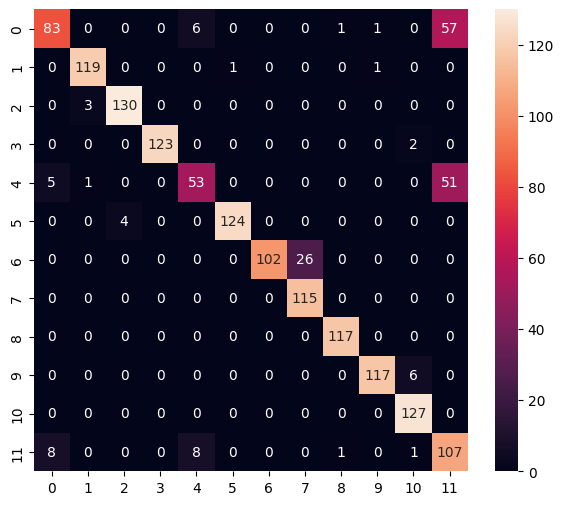

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.56      0.68       148
           1       0.97      0.98      0.98       121
           2       0.97      0.98      0.97       133
           3       1.00      0.98      0.99       125
           4       0.79      0.48      0.60       110
           5       0.99      0.97      0.98       128
           6       1.00      0.80      0.89       128
           7       0.82      1.00      0.90       115
           8       0.98      1.00      0.99       117
           9       0.98      0.95      0.97       123
          10       0.93      1.00      0.97       127
          11       0.50      0.86      0.63       125

    accuracy                           0.88      1500
   macro avg       0.90      0.88      0.88      1500
weighted avg       0.90      0.88      0.88      1500



In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [17]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [18]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /var/folders/1s/zfn5t7ds1c723pzqnp2f71nr0000gn/T/tmpvea25xaa/assets


INFO:tensorflow:Assets written to: /var/folders/1s/zfn5t7ds1c723pzqnp2f71nr0000gn/T/tmpvea25xaa/assets


Saved artifact at '/var/folders/1s/zfn5t7ds1c723pzqnp2f71nr0000gn/T/tmpvea25xaa'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 26), dtype=tf.float32, name=None)
Captures:
  5540142672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5540149584: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5540146128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5540146512: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5541376464: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5541373008: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1726141924.494814 9886026 tf_tfl_flatbuffer_helpers.cc:392] Ignored output_format.
W0000 00:00:1726141924.495392 9886026 tf_tfl_flatbuffer_helpers.cc:395] Ignored drop_control_dependency.


7504

# Inference test

In [19]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [20]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [21]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [24]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 236 μs, sys: 1.21 ms, total: 1.45 ms
Wall time: 4.85 ms


In [25]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[7.8474575e-01 1.4140633e-03 1.9594317e-03 2.9659152e-04 1.1388553e-01
 8.4501534e-04 6.3137470e-08 4.5628759e-09 5.3810811e-04 1.0621933e-03
 2.5744198e-06 9.5250681e-02 2.7919870e-13 5.4008239e-16 2.4420338e-16
 7.4861585e-15 4.3610754e-16 8.1160840e-14 2.6087692e-17 1.4976165e-16
 4.8470491e-17 5.9043994e-15 3.8092012e-15 2.1386438e-15 6.6245049e-15
 1.8357006e-14]
0
